In [280]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use("ggplot")


In [ ]:
# Load data and display fisrt 5
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv", index_col=0) 
data.head()

In [ ]:
# reset format 1st coumn as Date object
data_temp = data
data_temp

rank = [[], [], [], []]
sales_rank = [1000, 10000, 100000, 1000000]

for n in range(len(rank)):
    rank[n] = data_temp.columns[data_temp.sum() < sales_rank[n]]
    data_temp = data_temp.drop(rank[n], axis=1)
    
[len(count) for count in rank]

In [ ]:
high, medium, low, very_low = rank[3], rank[2], rank[1], rank[0]

1. Create an initial exploratory chart showing line plots for all pages using one of the examples from the lecture.


In [ ]:

data.plot(figsize=(8,8));

2. The high volume pages are not particularly interesting as most visitors to the site use these. Instead the company is interested in driving up engagement with the site by getting users to explore further. They want to focus on medium volume pages, so create a chart showing line plots for these with a legend indicating which is which.

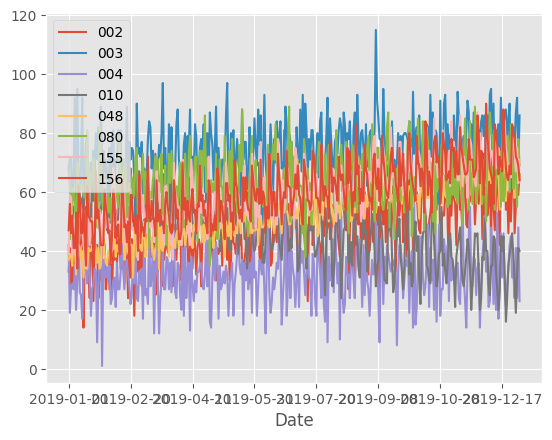

In [250]:
data[medium].plot()
plt.legend(loc="best");

3. The previous chart is a little overcrowded, so create a further chart for medium volume pages which also includes a 14-day rolling average for each time series.

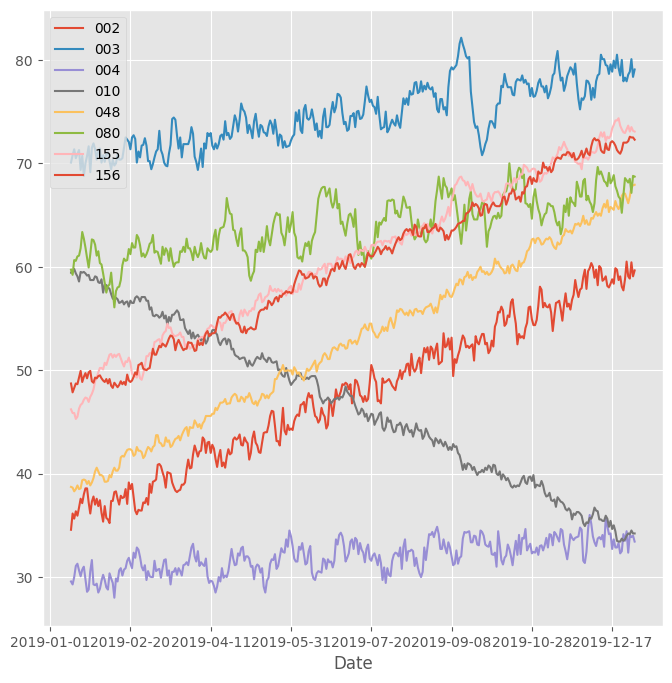

In [251]:
period = 14
moving_average = data[medium].rolling(window=period).mean()
moving_average.plot(figsize=(8,8));

4. Now create a further chart for medium volume pages which also includes a trendline (so it should show the original time series, 14-day rolling average and trendline combined).


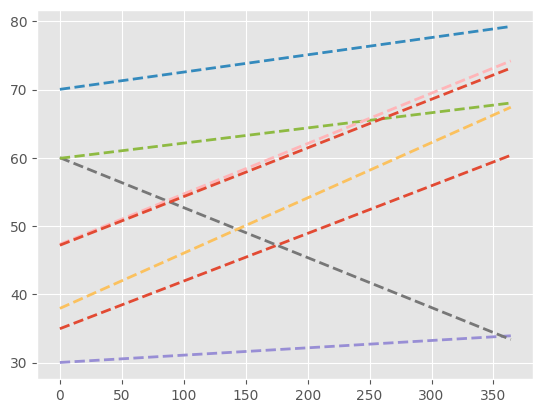

In [252]:
# Building a trendline with numpy
from typing import Any, Iterable
def add_trend(data: Iterable[Any], column: list, degree=1):
    for name in column:
        x = np.arange(len(data[name]))
        y = np.polyfit(x, data[name], degree)
        trend = np.poly1d(y)
        plt.plot(x, trend(x), linewidth=2, linestyle="--")

add_trend(data, medium)

5. Finally make the plot a little easier to interpret as follows:
- Make the line width a little thinner for the original time series but not so thin that it can’t be seen.
- Make the trendline a dashed line rather than continuous. [Hint: search the lecture notes for the linestyle parameter.]
- Manually reorder the selected pages so that the order of items in the legend (top to bottom) matches the visual order of the lines in the chart.


[Hint: if you plot the rolling average lines before plotting the original time-series, matplotlib will show thick lines in the legend (as it picks the first set of lines to create the legend; also don’t forget to reset the colours twice (before each new set of lines).]

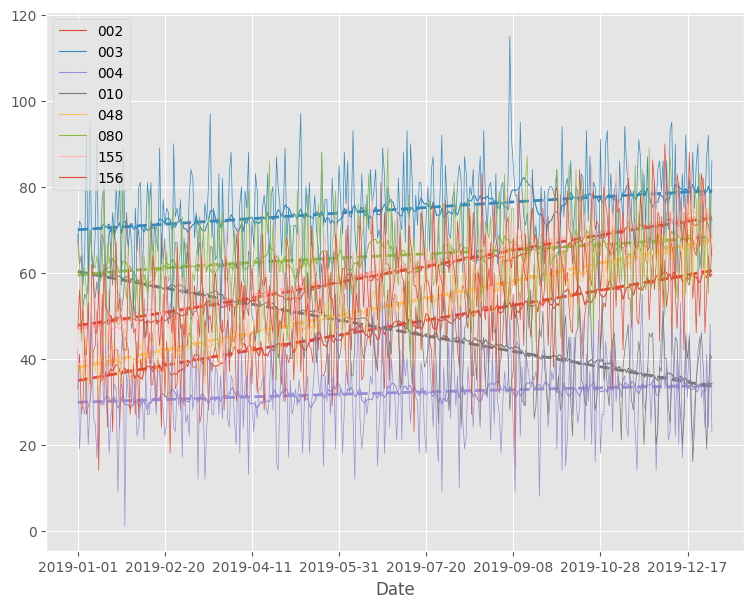

In [287]:
period = 14
midi = data.sum().sort_values(ascending=False)
moving_average = data[medium].rolling(window=period).mean()
moving_average.plot(figsize=(9,7), linewidth=.8)
plt.gca().set_prop_cycle(None)
add_trend(data, medium, 3)
plt.gca().set_prop_cycle(None)
plt.plot(data[medium], linewidth=.5)
plt.show()

## Exploration B
The file world_population.csv (available at https://tinyurl.com/ChrisCoDV/world_population.csv) contains data about population densities from 1960 to 2016. Note this is population density (i.e. the number of people per square kilometer) and not absolute population. So some of the smallest countries have the highest densities.

In [358]:
population = pd.read_csv("https://tinyurl.com/ChrisCoDV/world_population.csv",index_col=1)
population.head()

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.972222,312.366667,314.983333,316.827778,318.666667,320.622222,...,562.322222,563.011111,563.422222,564.427778,566.311111,568.850000,571.783333,574.672222,577.161111,NaN
AND,Andorra,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,30.587234,32.714894,34.914894,37.170213,39.470213,41.800000,...,180.591489,182.161702,181.859574,179.614894,175.161702,168.757447,161.493617,154.863830,149.942553,NaN
AFG,Afghanistan,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.038148,14.312061,14.599692,14.901579,15.218206,15.545203,...,39.637202,40.634655,41.674005,42.830327,44.127634,45.533197,46.997059,48.444546,49.821649,NaN
AGO,Angola,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.305195,4.384299,4.464433,4.544558,4.624228,4.703271,...,15.387749,15.915819,16.459536,17.020898,17.600302,18.196544,18.808215,19.433323,20.070565,NaN
ALB,Albania,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,...,108.394781,107.566204,106.843759,106.314635,106.013869,105.848431,105.717226,105.607810,105.444051,NaN


1. The data in this exploration also involves more work to get it into shape so read in the data and wrangle it as follows (slightly different to last week):
First, the country name is a bit inconvenient to use to select specific countries so instead we will use the country code. However, that means we need to use column 1 as the index column and not column 0.


Next, each column contains the data from a particular year, whilst each row contains the data for a country. We would like it the other way around to match the previous examples, so transpose it. [Hint: you should have done this last week.]

In [359]:
population = population.T
population.head()

Country Code,ABW,AND,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ASM,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Indicator Name,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...,Population density (people per sq. km of land ...
Indicator Code,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,...,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST,EN.POP.DNST
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,307.972222,30.587234,14.038148,4.305195,60.576642,6.978698,1.207955,7.656358,67.93955,102.39,...,108.845126,5.39032,NaN,23.694862,39.618728,9.946897,14.796892,6.897825,4.227724,10.021037


Next, drop the initial rows which contain descriptive data – the rows you need to drop are 'Country Name', 'Indicator Name' and 'Indicator Code'. [Hint: you should have done this last week except dropping Country Code rather than Country Name.]

In [351]:
population.columns

Index(['Country Name', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object')

In [360]:
population = population.drop(['Country Name', 'Indicator Name', 'Indicator Code', "1960", "2016"], axis=0)
population.index = pd.to_datetime(population.index)
population.head()

Country Code,ABW,AND,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ASM,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
1961-01-01,307.972222,30.587234,14.038148,4.305195,60.576642,6.978698,1.207955,7.656358,67.93955,102.39,...,108.845126,5.39032,NaN,23.694862,39.618728,9.946897,14.796892,6.897825,4.227724,10.021037
1962-01-01,312.366667,32.714894,14.312061,4.384299,62.456898,7.171974,1.342584,7.778624,70.325606,105.59,...,110.980368,5.562428,NaN,24.102679,40.913781,10.112857,15.216878,7.075824,4.359305,10.356112
1963-01-01,314.983333,34.914894,14.599692,4.464433,64.329234,7.372223,1.497799,7.900729,72.723112,109.415,...,113.170912,5.739295,NaN,24.602465,42.248763,10.28373,15.609838,7.261381,4.496824,10.703901
1964-01-01,316.827778,37.170213,14.901579,4.544558,66.209307,7.579523,1.653349,8.022073,75.101264,113.505,...,115.438262,5.917227,NaN,25.106286,43.587986,10.460234,15.984431,7.456342,4.639914,11.062585
1965-01-01,318.666667,39.470213,15.218206,4.624228,68.058066,7.793882,1.798062,8.14246,77.437654,117.59,...,117.79471,6.094094,NaN,25.620065,44.900353,10.642972,16.348334,7.661877,4.788452,11.431128


In [361]:
population.index

DatetimeIndex(['1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01'],
              dtype

2. Create a chart showing line plots for population densities for all countries over the period. Use the legend to work out the country codes of the top five countries and then comment out the legend.

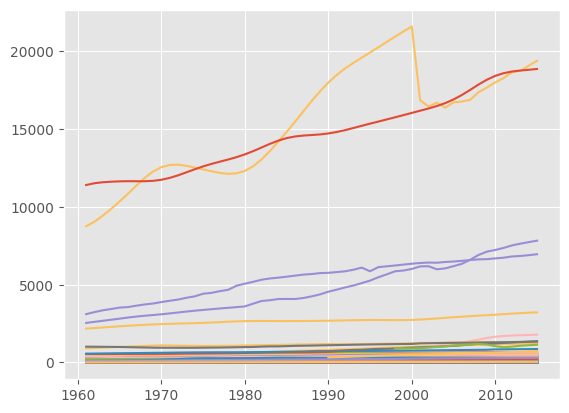

<Figure size 800x1600 with 0 Axes>

In [363]:
plt.plot(population)
plt.figure(figsize=(8,16));
# plt.legend(population["Country Code"])

Now create a chart showing just the top five countries by population density. Make sure that the y-axis is zeroed to get a fair comparison.

In [402]:
rank = [[], [], [], []]
density = [500, 1000, 3000, 30000]
temp_pop = population
for n in range(len(rank)):
    rank[n] = temp_pop.columns[temp_pop.max() < density[n]]
    temp_pop = temp_pop.drop(rank[n], axis=1)


# for n in range(len(rank)):
#     rank[n] = data_temp.columns[data_temp.sum() < sales_rank[n]]
#     data_temp = data_temp.drop(rank[n], axis=1)

very_low_dens, low_dens, medium_dens, high_dens = rank[0], rank[1], rank[2], rank[3]
[len(count) for count in rank]

[240, 11, 6, 5]

(0.0, 22566.1325)

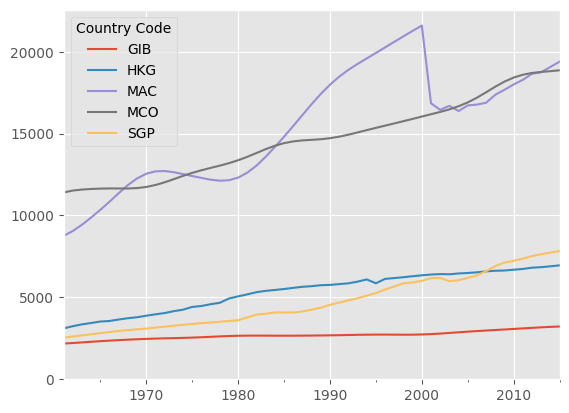

In [413]:
population[high_dens].plot()
plt.ylim(0)

In [395]:
population.shape

(55, 264)